Import des bibliothèques

In [3]:
#https://ledatascientist.com/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Importé")

Importé


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Connexion avec le Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Intégration du fichier voulu dans "df"

In [175]:
df=pd.read_csv('/content/gdrive/My Drive/Python/Data/datasets_723010_1257097_fatal-police-shootings-data.csv')
#df_filtre = df [ df ["armed"] != "knife"]
#df_filtre = df_filtre [ df_filtre ["armed"] != "gun"]
nombre_WA = np.sum(df.state=="RI")
nombre_WA

4

Analyse du DATASET :

Concernant les types de données, on a des "objet" en majorité, une variable "bool" et un float.
Ce DATASET dispose de colonnes indiquant des noms, des manières de mourrir, quel arme cette personne avait, son sexe, la ville etc ...
On en déduit très simplement, en regardant en plus le nom du fichier, que ce fichier répertorie les informations des personnes décédées lors d'intervention de police.

Il y a 14 colonnes différentes ce qui nous laisse beaucoup de choix et d'idées à exploiter.

Le premier graphique auquel on peut penser, c'est évidemment la quantité de mort en fonction de l'origine ethnique de la victime et de son sexe.
D'autres graphiques viennent ensuite en tête : 
*   Tendance du nombre de morts en fonction des états
*   Tendance de l'age des morts
*   Nombre de morts par période

Graphiques :

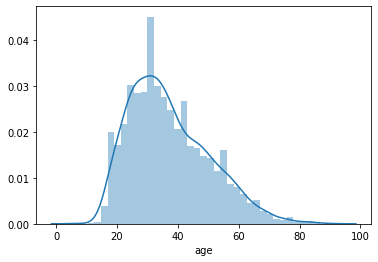

In [7]:
x= df.age
sns.distplot(x)

Ce graphique met en évidence la tendance de l'age  des personnes mourant lors des interventions de police : ~~30 ans

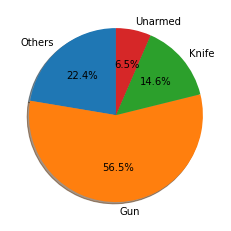

In [64]:
armed_gun = np.sum(df.armed=="gun")
armed_knife = np.sum(df.armed=="knife")
armed_unarmed = np.sum(df.armed=="unarmed")
armed_others = sum(1 for _ in df.armed)
armed_others = armed_others - armed_knife - armed_gun - armed_unarmed

sizes = [armed_others, armed_gun, armed_knife, armed_unarmed]
labels = 'Others', 'Gun', 'Knife', 'Unarmed'
x = plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Ce diagramme circulaire met en évidence les armes qui ont été utilisées par la victime de l'intervention

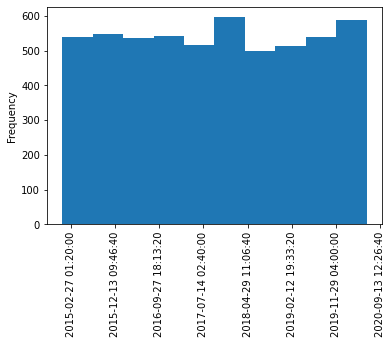

In [130]:
"""
#plt.scatter(df.date, df.date)
#x= df.date.count(df.date)
#sns.distplot(x)
pd.to_datetime(df.date)
df.groupby(df.date)
"""
"""
df["date"] = df["date"].astype("datetime64")
df2 = df.date
df.date.groupby(df["date"]).count().plot(kind="bar")
"""
fig, ax = plt.subplots()
df["date"].astype(np.int64).plot.hist(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
plt.show()

Diagramme visant à obtenir un aperçu sur les periodes avec le plus de morts (pas encore finis).

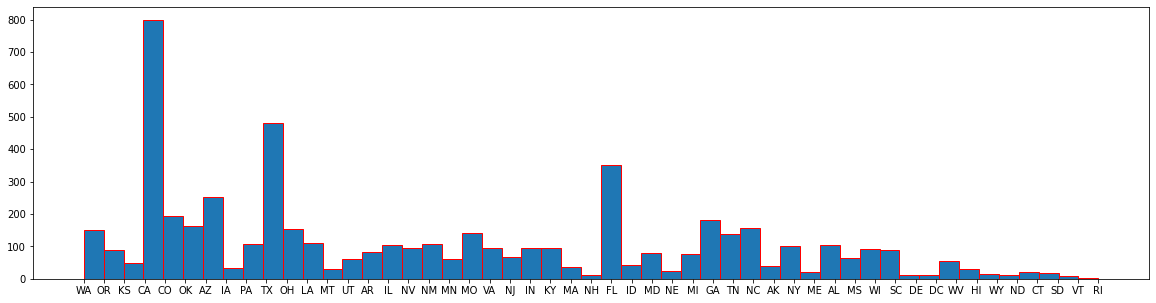

In [174]:
plt.figure(1, figsize=(20, 5))
x = plt.hist(df.state,edgecolor = 'red', bins=51)


Ce grahique met en évidence le nombre de mort en fonction des états. On peut ainsi voir que certains états ont un nombre de mort par intervention de police extremement élevé !

In [179]:
race_W = np.sum(df.race=="W")
race_B = np.sum(df.race=="B")
race_H = np.sum(df.race=="H")
race_A = np.sum(df.race=="A")
race_N = np.sum(df.race=="N")
race_O = np.sum(df.race=="O")

df_CA = df [ df["state"] == "CA"]
df_CA

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
10,19,Patrick Wetter,2015-01-06,shot and Tasered,knife,25.0,M,W,Stockton,CA,False,attack,Not fleeing,False
22,43,Brian Barbosa,2015-01-11,shot,gun,23.0,M,H,South Gate,CA,False,attack,Not fleeing,False
35,63,Jose Ceja,2015-01-15,shot,knife,36.0,M,H,Fairfield,CA,True,other,Not fleeing,False
38,68,Zaki Shinwary,2015-01-16,shot and Tasered,knife,48.0,M,O,Fremont,CA,False,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,5900,Erik Salgado,2020-06-06,shot,undetermined,22.0,M,H,Oakland,CA,False,undetermined,Not fleeing,False
5400,5908,Jarrid Hurst,2020-06-07,shot,knife,35.0,M,W,Industry,CA,True,other,Not fleeing,False
5406,5914,Mason James Lira,2020-06-11,shot,gun,26.0,M,W,Paso Robles,CA,True,attack,Foot,False
5407,5915,Michael Thomas,2020-06-11,shot,undetermined,62.0,M,B,Lancaster,CA,False,undetermined,Not fleeing,False
